# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [97]:
#units=imperial (other url was not working)

base_url="https://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+weather_api_key
city = "moscow"
full_url = base_url+"&q="+city
response = requests.get(full_url).json()
response

{'coord': {'lon': 37.6156, 'lat': 55.7522},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 63.64,
  'feels_like': 62.06,
  'temp_min': 61.23,
  'temp_max': 63.66,
  'pressure': 1018,
  'humidity': 50,
  'sea_level': 1018,
  'grnd_level': 999},
 'visibility': 10000,
 'wind': {'speed': 8.28, 'deg': 136, 'gust': 23.31},
 'clouds': {'all': 46},
 'dt': 1727883173,
 'sys': {'type': 2,
  'id': 2095214,
  'country': 'RU',
  'sunrise': 1727840075,
  'sunset': 1727881371},
 'timezone': 10800,
 'id': 524901,
 'name': 'Moscow',
 'cod': 200}

In [4]:
Temp = response['main']['temp_max']
print(Temp)

53.38


In [5]:
Temp_C = round((Temp-32)/1.8,2)
print(Temp_C)

11.88


In [6]:
Humidity = response['main']['humidity']
print(Humidity)

36


In [7]:
Clouds = response['clouds']['all']
print(Clouds)

72


In [8]:
Wind_Speed = response['wind']['speed']
print(Wind_Speed)

7.23


In [10]:
Date = response['dt']
print(Date)

1727845910


In [11]:
Country = response['sys']['country']
print(Country)

RU


In [12]:
Latitude = response['coord']['lat']
print(Latitude)

55.7522


In [13]:
Longitude = response['coord']['lon']
print(Longitude)

37.6156


In [14]:
response.keys()
response

{'coord': {'lon': 37.6156, 'lat': 55.7522},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 53.15,
  'feels_like': 49.86,
  'temp_min': 48.63,
  'temp_max': 53.38,
  'pressure': 1020,
  'humidity': 36,
  'sea_level': 1020,
  'grnd_level': 1001},
 'visibility': 10000,
 'wind': {'speed': 7.23, 'deg': 135, 'gust': 21.41},
 'clouds': {'all': 72},
 'dt': 1727845910,
 'sys': {'type': 2,
  'id': 2000314,
  'country': 'RU',
  'sunrise': 1727840075,
  'sunset': 1727881371},
 'timezone': 10800,
 'id': 524901,
 'name': 'Moscow',
 'cod': 200}

In [15]:
weather_Moscow = {"Temperature(F)": Temp, "Temperature(C)": Temp_C, "Humidity": Humidity, "Cloudiness": Clouds, "Wind Speed": Wind_Speed,
                 "Country": Country, "Date": Date, "Longitude": Longitude, "Latitude": Latitude}
weather_Moscow

{'Temperature(F)': 53.38,
 'Temperature(C)': 11.88,
 'Humidity': 36,
 'Cloudiness': 72,
 'Wind Speed': 7.23,
 'Country': 'RU',
 'Date': 1727845910,
 'Longitude': 37.6156,
 'Latitude': 55.7522}

In [17]:
# Set the API base URL

base_url="https://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city
weather_py = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Loop through all the cities in our list to fetch weather data
for city in cities:
   # time.sleep(60)
    try:
        full_url = base_url+"&q="+city
        response = requests.get(full_url).json()
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']    
        date = response['dt']
        longitude = response['coord']['lon']
        latitude = response['coord']['lat']
        weather_dict = {"City": city, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "wind_speed": wind_speed,
                        "Date": date,"Country": country,  "Country": country,  "Longitude": longitude, "Latitude": latitude}
        weather_py.append(weather_dict)   
        print(city + " found") 
    except:
        print("City not found. Skipping..") 

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")







Beginning Data Retrieval     
-----------------------------
manokwari found
strelka found
hermanus found
acarau found
college found
hammerfest found
edinburgh of the seven seas found
grytviken found
punta arenas found
port-aux-francais found
rapid city found
waitangi found
arraial do cabo found
puerto natales found
ushuaia found
olonkinbyen found
bethel found
goundam found
porto cristo found
ancud found
booue found
kavaratti found
kiruna found
isafjordur found
papatowai found
hawaiian paradise park found
pisco found
ilulissat found
cold lake found
kedrovyy found
City not found. Skipping..
quellon found
juneau found
mount isa found
alice springs found
kingston found
kandahar found
udachny found
luderitz found
kolokani found
adamstown found
tolanaro found
saint-pierre found
saint-junien found
nikolayevsk-on-amure found
jamestown found
kasangulu found
mount gambier found
blackmans bay found
kirensk found
ciudad lazaro cardenas found
brookings found
anadyr found
aldan found
oum hadjer foun

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_weather= pd.DataFrame(weather_py)
city_weather.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
0,manokwari,85.19,65,51,9.37,1727848918,ID,134.0833,-0.8667
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
2,hermanus,55.80,72,96,15.17,1727848919,ZA,19.2345,-34.4187
3,acarau,77.16,82,51,13.91,1727848919,BR,-40.1200,-2.8856
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569


In [20]:
# Export the City_Data into a csv

city_weather.to_csv("city_weather.csv", index_label="City_ID")


In [21]:
# Read saved data
city_weather_df = pd.read_csv("city_weather.csv", index_col="City_ID")

# Display sample data
city_weather_df.head()


,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
City_ID,,,,,,,,,
0,manokwari,85.19,65,51,9.37,1727848918,ID,134.0833,-0.8667
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
2,hermanus,55.80,72,96,15.17,1727848919,ZA,19.2345,-34.4187
3,acarau,77.16,82,51,13.91,1727848919,BR,-40.1200,-2.8856
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569


In [22]:
# Show Record Count
city_weather_df.count()

City           589
Temperature    589
Humidity       589
Cloudiness     589
wind_speed     589
Date           589
Country        585
Longitude      589
Latitude       589
dtype: int64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

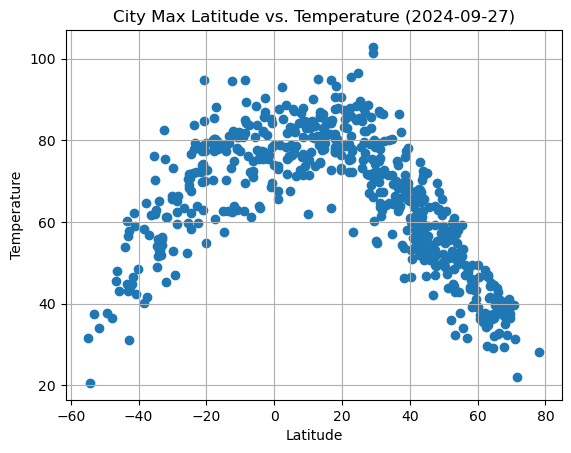

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_weather["Latitude"], city_weather["Temperature"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Max Latitude vs. Temperature (2024-09-27)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

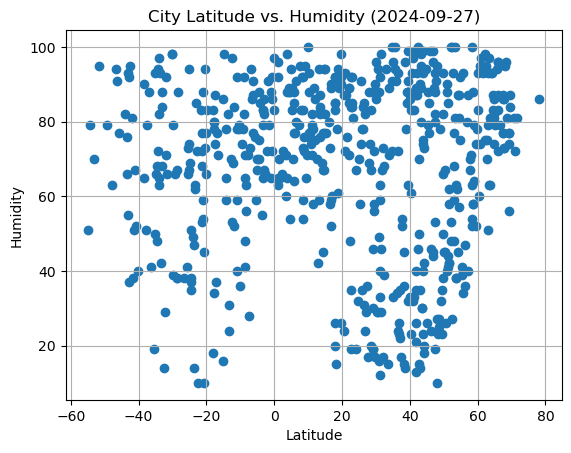

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_weather["Latitude"], city_weather["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2024-09-27)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

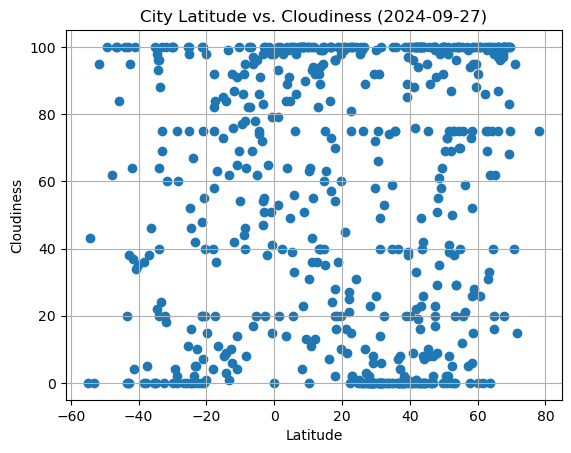

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2024-09-27)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

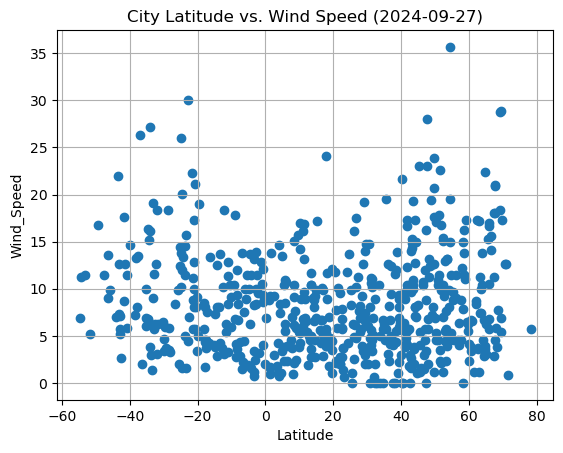

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_weather["Latitude"], city_weather["wind_speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("City Latitude vs. Wind Speed (2024-09-27)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [135]:
from scipy.stats import linregress

In [130]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Northern_Hemisphere = city_weather.loc[city_weather["Latitude"] >= 0]
 
# Display sample data
Northern_Hemisphere.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569
5,hammerfest,39.65,81,40,12.66,1727848919,NO,23.6821,70.6634
10,rapid city,65.55,18,0,8.05,1727848759,US,-103.2310,44.0805
15,olonkinbyen,31.41,72,95,12.62,1727848920,SJ,-8.7187,70.9221


In [131]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_Hemisphere = city_weather.loc[city_weather["Latitude"]<= 0]

# Display sample data
Southern_Hemisphere.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
0,manokwari,85.19,65,51,9.37,1727848918,ID,134.0833,-0.8667
2,hermanus,55.80,72,96,15.17,1727848919,ZA,19.2345,-34.4187
3,acarau,77.16,82,51,13.91,1727848919,BR,-40.1200,-2.8856
6,edinburgh of the seven seas,56.77,88,38,26.28,1727848919,SH,-12.3116,-37.0676
7,grytviken,20.55,79,43,11.27,1727848919,GS,-36.5092,-54.2811


###  Temperature vs. Latitude Linear Regression Plot

In [137]:
#linear_regress(Northern_Hemisphere["Latitude"], Northern_Hemisphere["Temperature"], (10, -30))

In [112]:
Northern_Hemisphere = city_weather.loc[city_weather["Latitude"] >= 0]
 
# Display sample data
Northern_Hemisphere.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569
5,hammerfest,39.65,81,40,12.66,1727848919,NO,23.6821,70.6634
10,rapid city,65.55,18,0,8.05,1727848759,US,-103.2310,44.0805
15,olonkinbyen,31.41,72,95,12.62,1727848920,SJ,-8.7187,70.9221


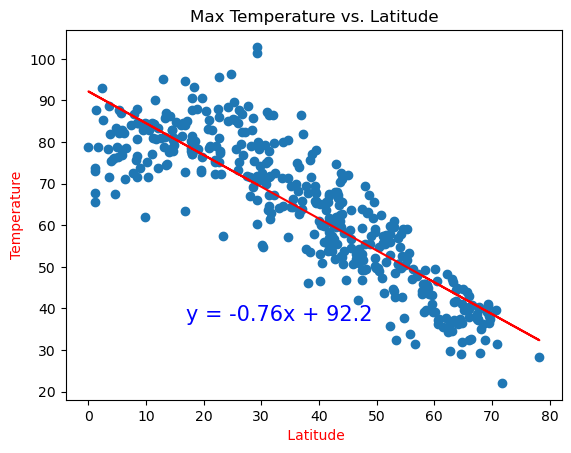

In [134]:
# Linear regression on Northern Hemisphere
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Temperature', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_NorthTempLatitude')

plt.show()


In [110]:
Northern_Hemisphere = city_weather.loc[city_weather["Latitude"] >= 0]
 
# Display sample data
Northern_Hemisphere.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569
5,hammerfest,39.65,81,40,12.66,1727848919,NO,23.6821,70.6634
10,rapid city,65.55,18,0,8.05,1727848759,US,-103.2310,44.0805
15,olonkinbyen,31.41,72,95,12.62,1727848920,SJ,-8.7187,70.9221


In [133]:
#linear_regress(Northern_Hemisphere["Latitude"],Northern_Hemisphere["Temperature"], (10, -30))

In [66]:
#linear_regress(Northern_Hemisphere["Latitude"], Northern_Hemisphere["Temperature"], (10, -30))

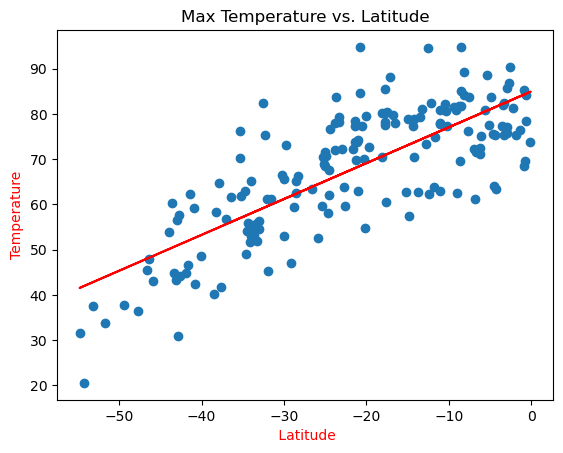

In [96]:
# Linear regression on Southern Hemisphere
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Temperature', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_SouthernTempLatitude')

plt.show()

In [69]:
#linear_regress(Southern_Hemisphere["Latitude"], Southern_Hemisphere["Temperature"], (-30, 8))

#**Discussion about the linear relationship:** 

In [94]:
#There is a fairly strong negative correlation between temperature and latitude on Northern Hemisphere.
#There is a relatively strong positive correlation between temperature and latitude on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [70]:
# Northern Hemisphere
Northern_Hemisphere = city_weather[city_weather["Latitude"]> 0]
Northern_Hemisphere

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569
5,hammerfest,39.65,81,40,12.66,1727848919,NO,23.6821,70.6634
10,rapid city,65.55,18,0,8.05,1727848759,US,-103.2310,44.0805
15,olonkinbyen,31.41,72,95,12.62,1727848920,SJ,-8.7187,70.9221
...,...,...,...,...,...,...,...,...,...
580,guiuan,84.61,71,100,6.82,1727848996,PH,125.7247,11.0333
583,moab,71.49,14,0,5.48,1727848996,US,-109.5498,38.5733
584,susanville,60.04,23,0,5.64,1727848745,US,-120.6530,40.4163
587,inirida,75.40,88,89,0.78,1727848754,CO,-67.9239,3.8653


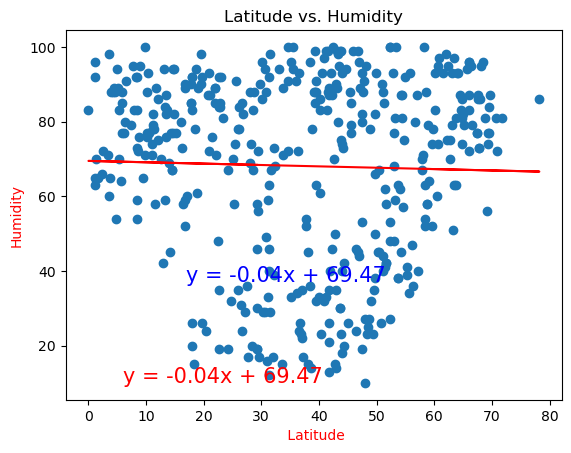

In [75]:
# Linear regression on Northern Hemisphere
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Latitude vs. Humidity")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_NorthTempHumidity')

plt.show()

The r^2-value is: 0.00014367159540169783


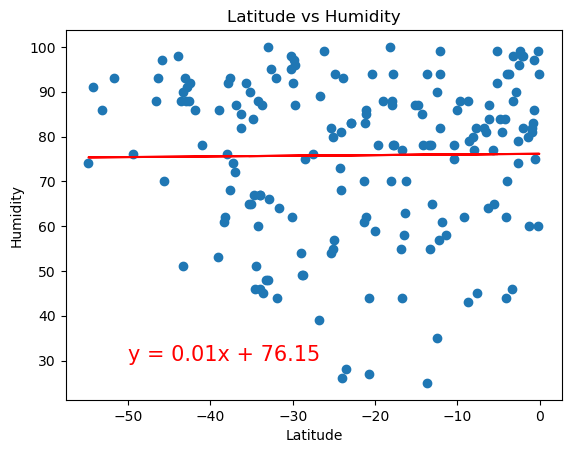

In [23]:
# Southern Hemisphere
Southern_Hemisphere = city_weather[city_weather["Latitude"]<= 0]
Southern_Hemisphere.head()

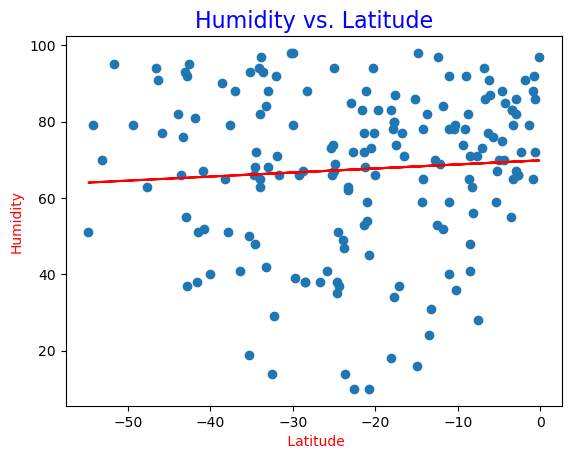

In [77]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_SouthernTempHumidity')
plt.show()

#**Discussion about the linear relationship:** 

In [93]:
#There is a relatively strong positive correlation between humidity and latitude on Northern Hemisphere.
#There is a relatively strong positive correlation correlation between humidity and latitude on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


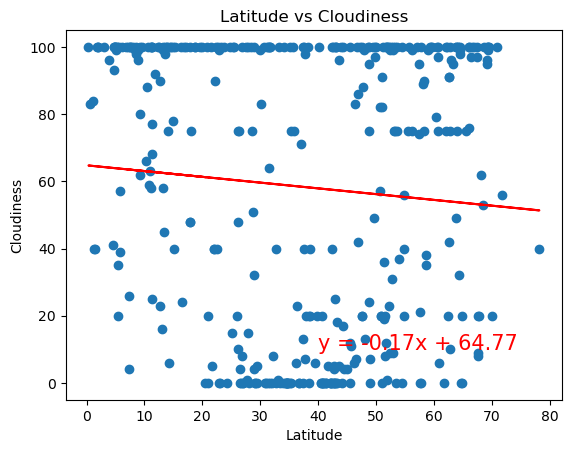

In [19]:
# Northern Hemisphere
# Northern_Hemisphere = city_weather.loc[city_weather["Latitude"] >= 0]
 
# Display sample data
Northern_Hemisphere.head()

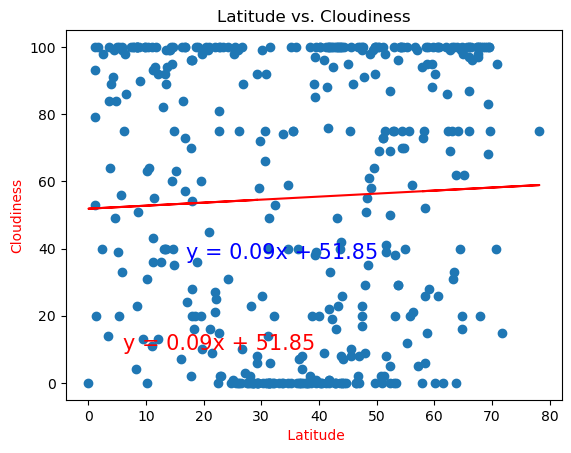

In [78]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Cloudiness', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Latitude vs. Cloudiness")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_NorthTempCloudiness')

plt.show()

The r^2-value is: 0.018616831531634456


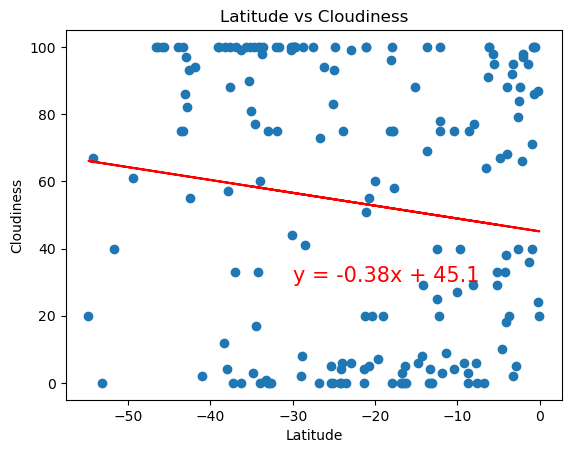

In [20]:
# Southern Hemisphere
# 

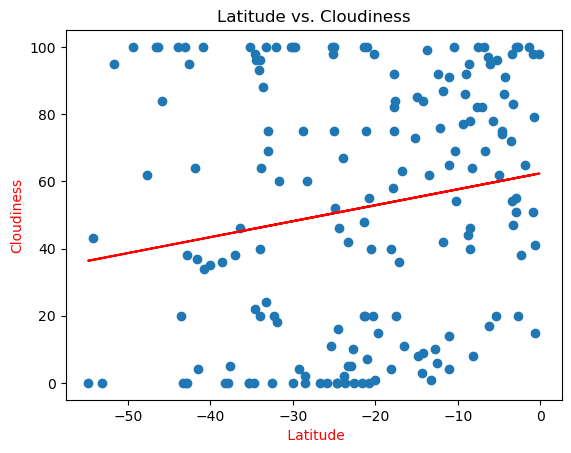

In [79]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Cloudiness', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Latitude vs. Cloudiness")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_SouthernTempCloudiness')

plt.show()

#**Discussion about the linear relationship:** 

In [ ]:
#There is a weak positive correlation between cloudiness and latitude on Northern Hemisphere.
#There is a relatively strong positive correlation between cloudiness and latitude on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


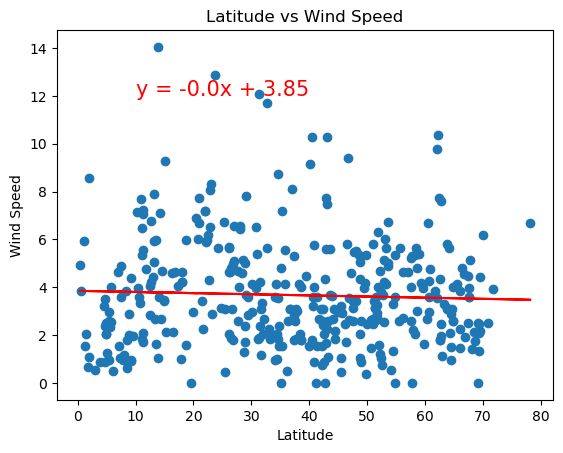

In [21]:
# Northern Hemisphere
# 

In [83]:
Northern_Hemisphere = city_weather[city_weather["Latitude"]> 0]
Northern_Hemisphere

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
1,strelka,45.79,71,73,12.19,1727848919,RU,93.0344,58.0728
4,college,36.45,74,16,3.65,1727848919,US,-147.8028,64.8569
5,hammerfest,39.65,81,40,12.66,1727848919,NO,23.6821,70.6634
10,rapid city,65.55,18,0,8.05,1727848759,US,-103.2310,44.0805
15,olonkinbyen,31.41,72,95,12.62,1727848920,SJ,-8.7187,70.9221
...,...,...,...,...,...,...,...,...,...
580,guiuan,84.61,71,100,6.82,1727848996,PH,125.7247,11.0333
583,moab,71.49,14,0,5.48,1727848996,US,-109.5498,38.5733
584,susanville,60.04,23,0,5.64,1727848745,US,-120.6530,40.4163
587,inirida,75.40,88,89,0.78,1727848754,CO,-67.9239,3.8653


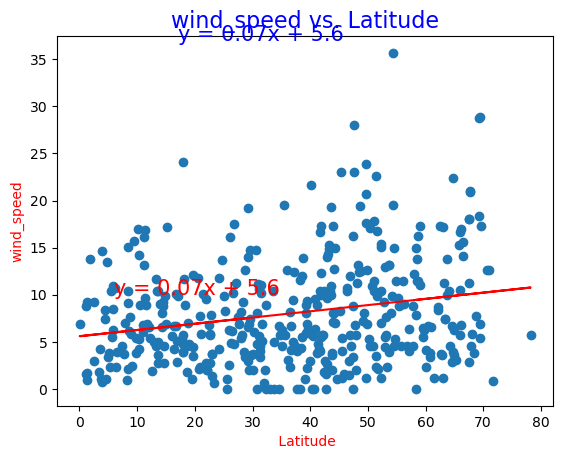

In [98]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('wind_speed', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("wind_speed vs. Latitude", fontsize = 16, color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_NorthWindSpeedLatitude')
plt.show()

The r^2-value is: 0.06495869418886388


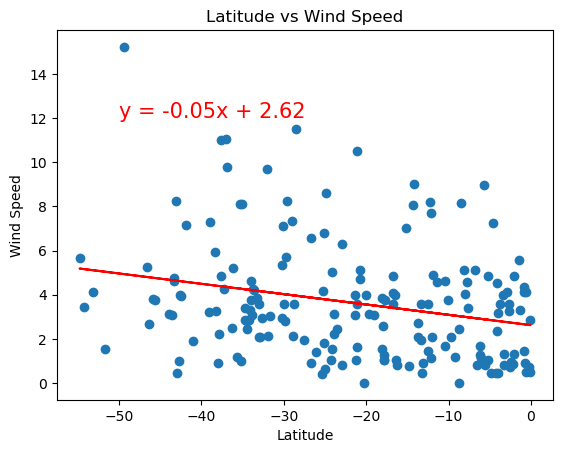

In [22]:
# Southern Hemisphere


In [88]:
Southern_Hemisphere = city_weather[city_weather["Latitude"]<= 0]
Southern_Hemisphere.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
0,manokwari,85.19,65,51,9.37,1727848918,ID,134.0833,-0.8667
2,hermanus,55.80,72,96,15.17,1727848919,ZA,19.2345,-34.4187
3,acarau,77.16,82,51,13.91,1727848919,BR,-40.1200,-2.8856
6,edinburgh of the seven seas,56.77,88,38,26.28,1727848919,SH,-12.3116,-37.0676
7,grytviken,20.55,79,43,11.27,1727848919,GS,-36.5092,-54.2811


In [90]:
#corr=st.pearsonr(weight,volume)[0]
#print(f"Southern Hemisphere - Wind Speed (mph) vs.Latitude Linear Regression {corr}")


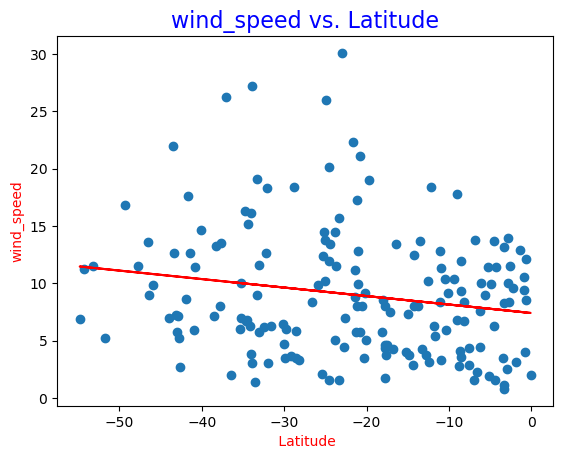

In [99]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('wind_speed', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("wind_speed vs. Latitude", fontsize = 16, color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear_SouthernWindSpeedLatitude')
plt.show()

#**Discussion about the linear relationship:** 

In [92]:
#There is a negligible to almost no correlation between wind speed and latitude on Northern Hemisphere.
#There is a weak negative correlation between wind speed and latitude on Southern Hemisphere.